In [1]:
from optical_flow import *

In [2]:
directory = 'MPI-Sintel-complete/training/clean/temple_2'
frames = read_frames(directory)
print(f"Read {len(frames)} frames")

Read 50 frames


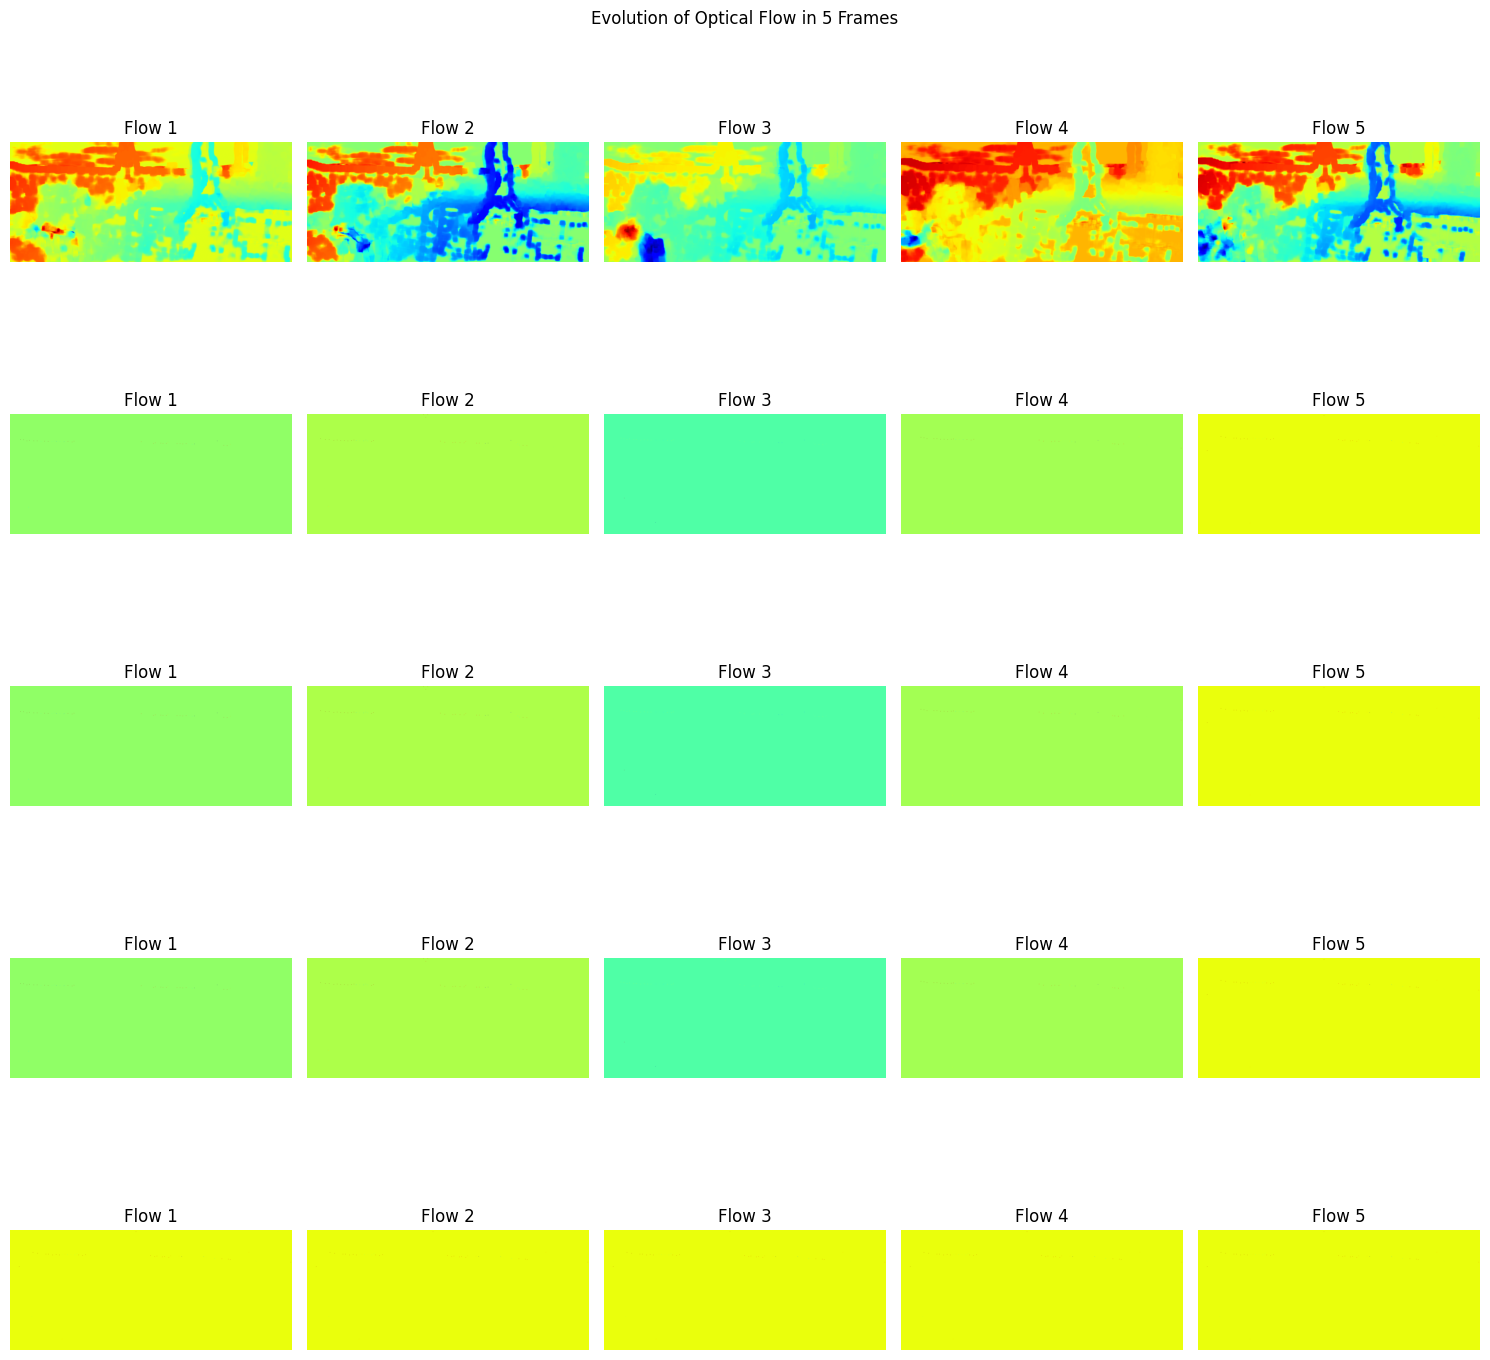

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 5, figsize=(15, 15))

for row in range(5):
    for col in range(5):
        if col + row * 5 < len(frames) - 1:
            frame1 = frames[col]
            frame2 = frames[col+1]
            if row == 0:
                flow = compute_optical_flow(frame1, frame2)
            elif row==1:
                flow = compute_optical_flow_lk(frame1, frame2)
            elif row==2:
                flow = compute_optical_flow_lk(frame1, frame2)
            axes[row, col].imshow(flow[..., 0], cmap='jet')
            axes[row, col].axis('off')
            axes[row, col].set_title(f'Flow {col + 1}')

plt.suptitle('Evolution of Optical Flow in 5 Frames')
plt.tight_layout()
plt.show()